<a href="https://colab.research.google.com/github/mohanrajv3/PRODIGY_DS_02/blob/main/notebookfb0131f21c.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'titanic:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-competitions-data%2Fkaggle-v2%2F3136%2F26502%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240508%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240508T133911Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D212e585da8d08748729da6664a13d2e38d4cf63aa889e2d4ceef9ae3c063b2ec5b508626964d5c8579b874a68d5a48735db0e0f9f5278b9c57e8c34e6e788959e4647d608d8ee7daac74778f689075791353cc56178be6ae378bcbad6e3db7f2f520df8aa46b371c53e31db4c86a82dcc79ea1eceea528438cf5ab5aa82dad762b84fcdd95ed91f9ca8a91c5598ad0e4b0abdc04af215abdc10e7b8c704214682999d2a24df9ab8f6adb1f0f7e4d24763b5dcbb81eb398a61976c924f9be1f92597d9f06a9fbcaac62a5a73971d375d4f743bd891cf388ca80187c9adf793441eea9f38092460da91aa9ed5ad07daf22c3548151960a69d3383febbc032fa0b7'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
train_data_path = '/kaggle/input/titanic/train.csv'
test_data_path = '/kaggle/input/titanic/test.csv'

In [ ]:
titanic_data = pd.read_csv(train_data_path)

In [ ]:
missing_values = titanic_data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [ ]:
titanic_data['Age'] = titanic_data['Age'].fillna(titanic_data['Age'].mean())
titanic_data['Cabin'] = titanic_data['Cabin'].fillna('Unknown')
titanic_data['Embarked'] = titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0])

In [ ]:
titanic_data['Survived'] = titanic_data['Survived'].astype('category')
titanic_data['Pclass'] = titanic_data['Pclass'].astype('category')
titanic_data['Sex'] = titanic_data['Sex'].astype('category')
titanic_data['Embarked'] = titanic_data['Embarked'].astype('category')

In [ ]:
print("Descriptive Statistics:\n", titanic_data.describe(include='all'))

Descriptive Statistics:
         PassengerId  Survived  Pclass                     Name   Sex  \
count    891.000000     891.0   891.0                      891   891   
unique          NaN       2.0     3.0                      891     2   
top             NaN       0.0     3.0  Braund, Mr. Owen Harris  male   
freq            NaN     549.0   491.0                        1   577   
mean     446.000000       NaN     NaN                      NaN   NaN   
std      257.353842       NaN     NaN                      NaN   NaN   
min        1.000000       NaN     NaN                      NaN   NaN   
25%      223.500000       NaN     NaN                      NaN   NaN   
50%      446.000000       NaN     NaN                      NaN   NaN   
75%      668.500000       NaN     NaN                      NaN   NaN   
max      891.000000       NaN     NaN                      NaN   NaN   

               Age       SibSp       Parch  Ticket        Fare    Cabin  \
count   891.000000  891.000000  891

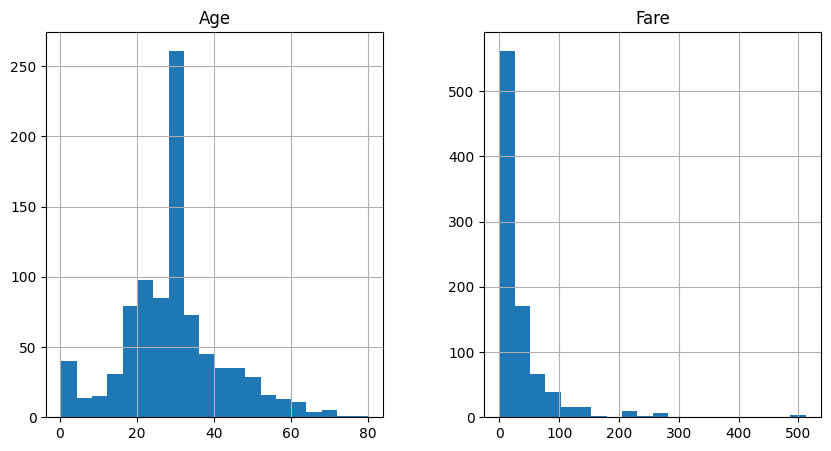

In [ ]:
titanic_data[['Age', 'Fare']].hist(bins=20, figsize=(10, 5))
plt.show()

In [ ]:
numeric_data = titanic_data.select_dtypes(include=['float64', 'int64'])

In [ ]:
correlation_matrix = numeric_data.corr()
print("Correlation Matrix:\n", correlation_matrix)

Correlation Matrix:
              PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.033207 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.069809 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.331339  0.083081  0.018443   
Age             0.033207 -0.069809 -0.331339  1.000000 -0.232625 -0.179191   
SibSp          -0.057527 -0.035322  0.083081 -0.232625  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.179191  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.091566  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.091566  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000  


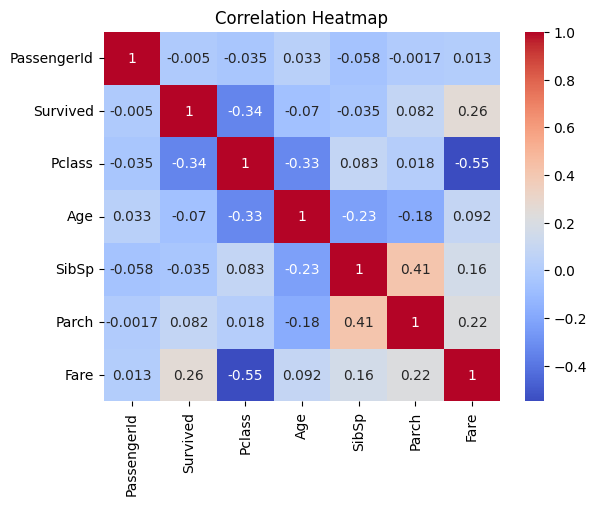

In [ ]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

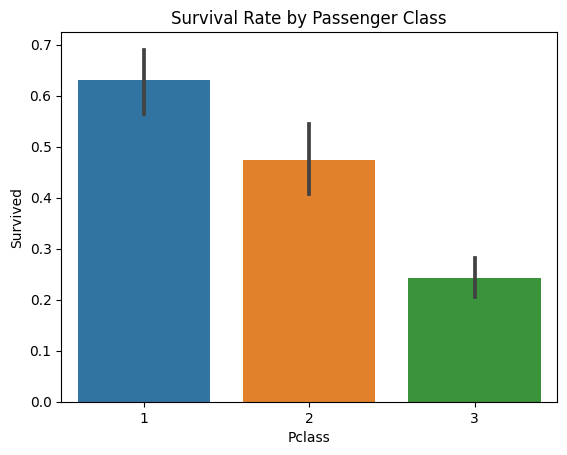

In [ ]:
sns.barplot(x='Pclass', y='Survived', data=titanic_data)
plt.title("Survival Rate by Passenger Class")
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


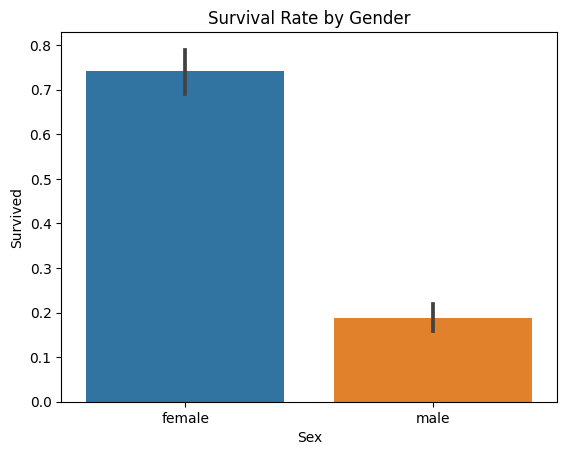

In [ ]:
sns.barplot(x='Sex', y='Survived', data=titanic_data)
plt.title("Survival Rate by Gender")
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


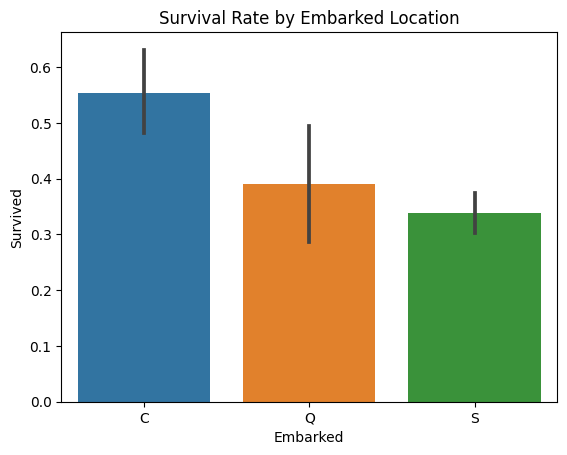

In [ ]:
sns.barplot(x='Embarked', y='Survived', data=titanic_data)
plt.title("Survival Rate by Embarked Location")
plt.show()